Activity: Computing Fancy Averages
==================
In this activity, you're going to learn about stochastic gradient descent (SGD) a popular technique for machine learning and data analytics. For historical reasons is it also called (iGM) incremental gradient method.

This workbook assumes some basic knowledge of derivatives. You will *not* be tested on this knowledge, and we will offer intuitive explanations.

In [1]:
import numpy as np

A simple example
=========
We'll keep it simple, but you'll get a sense of why these methods are useful! 
* Imagine we have a true parameter value $\mu$, e.g., how much you kale.
* We observe this value many times $N$ but always with some noise. We'll model this as _white noise_ or Gaussian random noise.
* In fancy notation, our data looks like:
$$y = \mu + {\mathcal N}(0,\sigma^2)$$
Let's see it in python

In [2]:
mu   = 5 # "true" value
std  = 0.1 # deviation
N    = 1000 # number of points 
data = [mu + np.random.normal(0,std) for i in range(N)]

Recover the parameter
============
Our goal is to recover the value $\mu$ from the observed data. Let's take a look at our data!

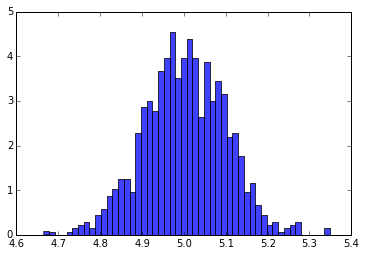

In [4]:
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# the histogram of the data
n, bins, patches = plt.hist(data, 50, normed=1, facecolor='blue', alpha=0.75)

Least squares
========
We'll set this problem up as a _least squares problem_.  Let $x$ be our predicted value (i.e. in the setup above, our prediction of $\mu$), and let the $y_i$s be our observed noisy data points (i.e. our noisy observations of $\mu$)

We define $f(x)$ the _loss_ function for least squares (_one can see why it's given this name_) 
$$f(x) = \sum_{i=1}^{n} (x - y_i)^2$$

To match the notation in the lecture, we could also write:
$$f(x) = \sum_{i=1}^{n} f(x,y_i) \text{ in which } f(x,y) = (x-y)^2$$

Our goal is to find $x$ such that: 
$$\min_{x} f(x) \text{ or, equivalently, } \min_{x} \sum_{i=1}^{n} (x - y_i)^2$$

Derivatives or Gradients
-----------------------
To do minimize we compute the derivative (gradient) with respect to $x$ as follows:
$$\nabla_x (x-y_i)^2 = 2(x-y_i)$$
_recall_ that the derivative is the _direction_ of maximal increase. 
  * To convince yourself, observe that if $x > y_i$ then $(x-y_i) > 0$ and $(x-y_i)^2$ will get more positive if you _increase_ $x$.
  * if $x < y_i$ then you should decrease $x$.

and so the derivative with respect to $x$ is
$$\nabla_x f(x) = 2\sum_{i=1}^{n} (x-y_i)$$

* In this case, our problem is simple enough that we can solve $\nabla_x f(x) = 0$ analytically:
$$ x = \frac{1}{N} \sum_{i=1}^{n} y_i$$
that is, $x$ is just the average of the $y_i$.

* For more complicated loss functions, we won't be able to solve it analytically! But this is just so we know the right answer (and it illustrates our point).

We'll use an iterative rule described below.

In [5]:
# The above code in python.
def loss(x,data): return sum([(x-y)^2 for y in data]) # the loss function
def igrad(x,y): return 2*(x-y) # gradient of a particular term
def grad(x,data): return sum(igrad(x,y) for y in data) # gradient of the entire thing.

Stochastic Gradient Descent
===============

We'll now use the algorithm from lecture to solve this.  _Recall_ that the idea is to estimate $\nabla_x f(x) = 2\sum_{i=1}^{n} (x-y_i)$ iteratively from just one random data point at a time:
$$x^{(k+1)} = x^{(k)} - \alpha_k \nabla_x f_i(x^{(k)})$$
or here
$$x^{(k+1)} = x^{(k)} - 2 \alpha_k (x^{(k)}-y_{\zeta(i)})$$
where $\zeta(i)$ picks a term at random, $x^{(k)}$ is the $x$ value (our predicted value) at the $k$th step of the algorithm, and $\alpha_k$ is our **step size**.

**In other words, we'll try to estimate the average here one random value at a time, rather than by averaging over all the points at once, and we'll see how close we get to the true value...**

We'll pick $\alpha_k = \frac{1}{k}$ we want it to shrink over time (but not too fast).

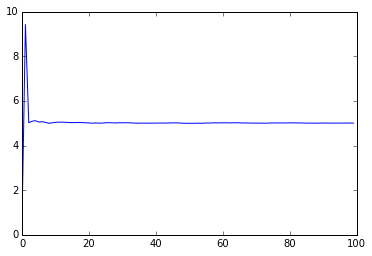

In [6]:
# our billion dollar algorithm!
x = np.random.rand() # start at a random point
import random
S = 100 # take 100 steps, looking at 1/10th of the data
old_x = np.zeros(S) # keep track of the old x

# This is our inner loop!
for i in range(S):
    old_x[i] = x # record so we can plot it
    zeta = random.randint(0,N-1)
    x = x - 1/float(i+1)*igrad(x,data[zeta])

# plot the values
plt.plot(range(S),old_x)

After just a few steps (without seeing all of the data), we have a pretty good estimate of the average!
* Even if we go down to a few terms (set $S$ smaller!)
* We didn't even look at the whole data set!

To Higher Dimensions! 
===========

A more complex model in higher dimensions.
* Let's do the same model in higher dimensions. 
* Our data are now a set of vectors $a_{i} \in \mathbb{R}^{p}$ and there are $N$ of them.
* We can think of the data as being generated by a model like: 
$$a_{i}^{T} x = b_i + {\cal N}(0,\sigma^2)$$

Our goal is to minimize:
$$\min_{x \in \mathbb{R}^{p}} \sum_{i=i}^{n} (a_i^T x - b_i)^2$$


In [7]:
N = 1000 # data points
p = 10   # total # of parameters
mu = 0.01 # noise
A = np.random.randn(N,p)  # matrix!
x = np.random.randn(p)
b = A*x + mu*np.random.randn(N,1)
print x

[-0.46704859  0.37733945 -0.57162585  1.64705637 -0.26232195  2.39142199
 -0.49883672 -0.04951352  0.07907335 -1.95174819]


Recovery
=====
We see $A$, $b$ but not $x$. Our goal is again to recover $x$.

Here our gradient requires a little fancier math:
$$\nabla_{x} (a_i^{T}x - b)^2 = 2(a_i^Tx - b)a_i^T$$

If you know single variable calculus, you can convince yourself a single coordinate at a time.

The loss of original model 11.1998826376.
The loss of our found model 13.0698139251.
Their distance 1.19366304125


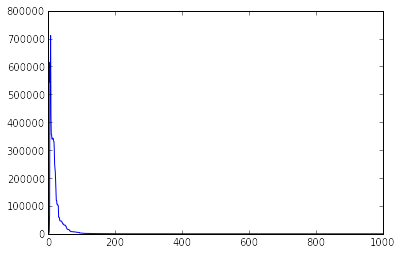

In [7]:
from numpy.linalg import norm
def loss(x,A): return norm(A*x)**2/N # A quick way to write the loss function
def igrad(x,a,b): return 2*(np.dot(a,x)-b)*a  # as described above

S  = 1000 # number of steps we plan to do, one "pass" over the data
x0 = np.random.randn(p)*0.1 # our initial guess (just random)

old_loss = np.zeros(S) # Bookkeeping for plotting (keeping track of the value of the loss)

# This is the business
# This is our inner loop!
for i in range(S):
    old_loss[i] = loss(x0,A) # record so we can plot it
    idx         = random.randint(0,N-1)
    x0 = x0 - 1/float(i+1)*igrad(x0,A[idx,:],b[idx])
    
# plot the values
plt.plot(range(S),old_loss)
print "The loss of original model {0}.".format(loss(x, A))
print "The loss of our found model {0}.".format(loss(x0,A)) 
print "Their distance {0}".format(norm(x - x0)**2)

Discussion
==========
* We can again compute the exact solution here (same basic derivative argument, just careful with vectors)
$$ \left(A^TA\right)^{-1} A^Tb = x $$

  * However, that requires forming an inverse (takes $\Omega(N^2)$ time!) 
  * Our quick and dirty method takes $O(N)$ time, but not a bad estimate for scanning the data once!
  * When data is huge $N$ is huge, $N^2$ is truly large!

Extensions
======
* We can use SGD in cases in which there is no analytic solution. Two examples
 * Logistic regression is ($y$ is the label in $\{-1,1\}$) for Logistic Regression 
 $$f_i(x,a_i, y) = (1 + \exp\{-y x^Ta_i\})^{-1}$$ 
 * Support vector machine is called the _Hinge Loss_ for SVM
 $$f_i(x,a_i,y)  = \max(0, 1-y(x^Ta_i))$$